In [4]:
import numpy as np
dataList = []
labelList = []
def loadData(fileName):
    f = open(fileName)
    for line in f.readlines():
        lineStr = line.split('\t')
        dataList.append([float(lineArr[0]),float(lineArr[1])])
        labelList.append(float(lineArr[2]))
    return dataList,labelList 

## 1.导入数据

In [17]:
 dataList,labelList  = loadData('testSet.txt')

## 2.训练支持向量机

In [133]:
from sklearn import svm
#基于libsvm工具箱,SVC非线性支持向量分类,可通过核定义其核函数，如‘linear’为线性，‘rbf’为径向基核函数
clf = svm.SVC(kernel='linear')
clf.fit(dataList,labelList)#训练

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 3.预测

In [154]:
clf.predict([[7.5,-1.5]])#预测类别
clf.decision_function([[7.5,-1.5]])#该SVC方法decision_function为每个样本提供每个类别的分数相当于回归

array([2.67967915])

In [137]:
#支持向量
clf.support_vectors_#获得支持向量
clf.support_#获得支持向量索引
clf.n_support_#获得支持向量属于不同类别的个数

array([2, 1])

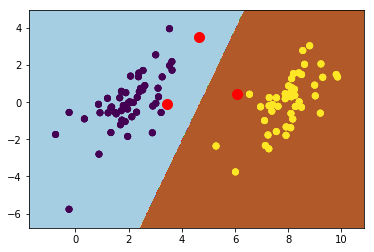

In [153]:
#绘制决策边界和支持向量
labelArr = np.array(labelList)
x_min, x_max = dataArr[:, 0].min() - 1, dataArr[:, 0].max() + 1
y_min, y_max = dataArr[:, 1].min() - 1, dataArr[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),#meshgrid在空间上取点
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])#ravel平铺
row = len(np.arange(y_min,y_max,0.02))
col = len(np.arange(x_min,x_max,0.02))
Z = Z.reshape([row,col])

#plt.cm中cm全称表示colormap，
#paired表示两个两个相近色彩输出，比如浅蓝、深蓝；浅红、深红；浅绿，深绿这种
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(dataArr[:, 0], dataArr[:, 1], c=labelList)
plt.scatter(dataArr[clf.support_,0],dataArr[clf.support_,1],c = 'red',s = 100,marker='o')#画出支持向量